In [13]:
#可视化中间激活
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
model = load_model('.\\checkpoint\\checkpoint873.ckpt')  
model.summary()

#参数
image_shape=(256,256,3)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 256, 256, 4)       112       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 128, 128, 4)      0         
 g2D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 128, 128, 4)       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 128, 128, 4)       148       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 64, 64, 4)        0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 64, 64, 4)        

In [14]:
#可视化，以及预测单张图片的标签
img_path = '.\\dataset\\test\\unstable\\unstable-090000_Rotate=320.0_o_x=-10_o_y=10.png'
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(image_shape[0], image_shape[1]))
#print('img=',img)
img_tensor = image.img_to_array(img)
print('img_tensor.shape=',img_tensor.shape)
#print('img_tensor=',img_tensor)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape) 
predictions = model.predict(img_tensor) 
print('predictions=',predictions) 

img_tensor.shape= (256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 113ms/step
predictions= [[0.99998283]]


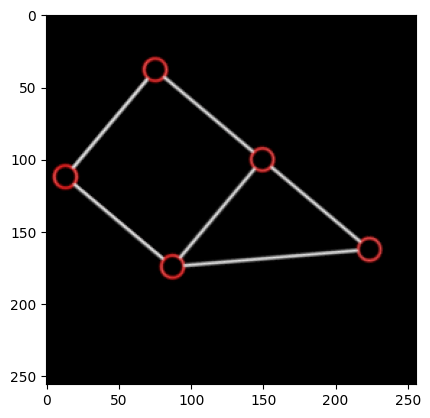

In [15]:
plt.imshow(img_tensor[0])
#cb = plt.colorbar(label='color bar settings') #通过colorbar()函数可以创建最简单的颜色条
plt.show()

In [16]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:18]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
'''
print('layer_outputs=',layer_outputs)
layer_outputs= [
<KerasTensor: shape=(None, 256, 256, 4) dtype=float32 (created by layer 'conv2d_42')>, 
<KerasTensor: shape=(None, 128, 128, 4) dtype=float32 (created by layer 'max_pooling2d_42')>, 
<KerasTensor: shape=(None, 128, 128, 4) dtype=float32 (created by layer 'dropout_42')>, 

<KerasTensor: shape=(None, 128, 128, 4) dtype=float32 (created by layer 'conv2d_43')>, 
<KerasTensor: shape=(None, 64, 64, 4) dtype=float32 (created by layer 'max_pooling2d_43')>, 
<KerasTensor: shape=(None, 64, 64, 4) dtype=float32 (created by layer 'dropout_43')>, 

<KerasTensor: shape=(None, 64, 64, 8) dtype=float32 (created by layer 'conv2d_44')>, 
<KerasTensor: shape=(None, 32, 32, 8) dtype=float32 (created by layer 'max_pooling2d_44')>,
 <KerasTensor: shape=(None, 32, 32, 8) dtype=float32 (created by layer 'dropout_44')>, 

<KerasTensor: shape=(None, 32, 32, 8) dtype=float32 (created by layer 'conv2d_45')>, 
<KerasTensor: shape=(None, 16, 16, 8) dtype=float32 (created by layer 'max_pooling2d_45')>,
 <KerasTensor: shape=(None, 16, 16, 8) dtype=float32 (created by layer 'dropout_45')>,

 <KerasTensor: shape=(None, 16, 16, 16) dtype=float32 (created by layer 'conv2d_46')>,
 <KerasTensor: shape=(None, 8, 8, 16) dtype=float32 (created by layer 'max_pooling2d_46')>, 
<KerasTensor: shape=(None, 8, 8, 16) dtype=float32 (created by layer 'dropout_46')>, 

<KerasTensor: shape=(None, 8, 8, 16) dtype=float32 (created by layer 'conv2d_47')>, 
<KerasTensor: shape=(None, 4, 4, 16) dtype=float32 (created by layer 'max_pooling2d_47')>,
 <KerasTensor: shape=(None, 4, 4, 16) dtype=float32 (created by layer 'dropout_47')>
]
'''

"\nprint('layer_outputs=',layer_outputs)\nlayer_outputs= [\n<KerasTensor: shape=(None, 256, 256, 4) dtype=float32 (created by layer 'conv2d_42')>, \n<KerasTensor: shape=(None, 128, 128, 4) dtype=float32 (created by layer 'max_pooling2d_42')>, \n<KerasTensor: shape=(None, 128, 128, 4) dtype=float32 (created by layer 'dropout_42')>, \n\n<KerasTensor: shape=(None, 128, 128, 4) dtype=float32 (created by layer 'conv2d_43')>, \n<KerasTensor: shape=(None, 64, 64, 4) dtype=float32 (created by layer 'max_pooling2d_43')>, \n<KerasTensor: shape=(None, 64, 64, 4) dtype=float32 (created by layer 'dropout_43')>, \n\n<KerasTensor: shape=(None, 64, 64, 8) dtype=float32 (created by layer 'conv2d_44')>, \n<KerasTensor: shape=(None, 32, 32, 8) dtype=float32 (created by layer 'max_pooling2d_44')>,\n <KerasTensor: shape=(None, 32, 32, 8) dtype=float32 (created by layer 'dropout_44')>, \n\n<KerasTensor: shape=(None, 32, 32, 8) dtype=float32 (created by layer 'conv2d_45')>, \n<KerasTensor: shape=(None, 16, 1

1/1 [==============================] - 0s 104ms/step
first_layer_activation.shape= (1, 256, 256, 4)


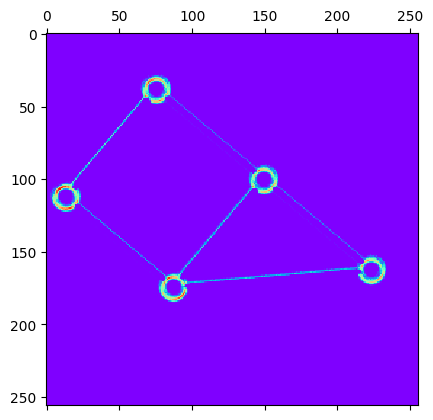

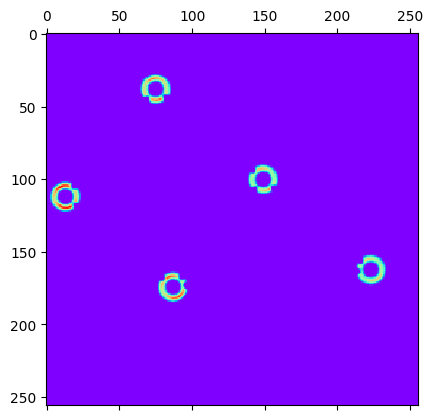

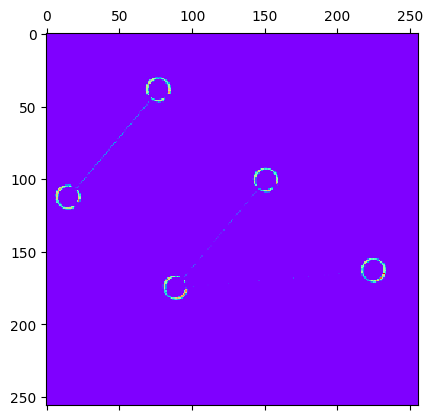

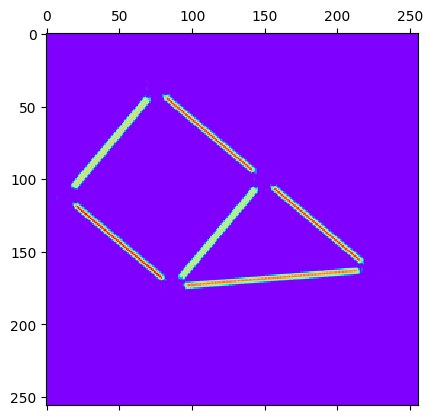

In [17]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print('first_layer_activation.shape=',first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 0], cmap='rainbow')   #红、橙、黄、绿、青、蓝、紫。     红色值最大、紫色最小
plt.matshow(first_layer_activation[0, :, :, 1], cmap='rainbow') 
plt.matshow(first_layer_activation[0, :, :, 2], cmap='rainbow') 
plt.matshow(first_layer_activation[0, :, :, 3], cmap='rainbow') 
plt.show()

layer_names= ['conv2d_42', 'max_pooling2d_42', 'dropout_42', 'conv2d_43', 'max_pooling2d_43', 'dropout_43', 'conv2d_44', 'max_pooling2d_44', 'dropout_44', 'conv2d_45', 'max_pooling2d_45', 'dropout_45', 'conv2d_46', 'max_pooling2d_46', 'dropout_46', 'conv2d_47', 'max_pooling2d_47', 'dropout_47']
conv2d_42 +n_features= 4


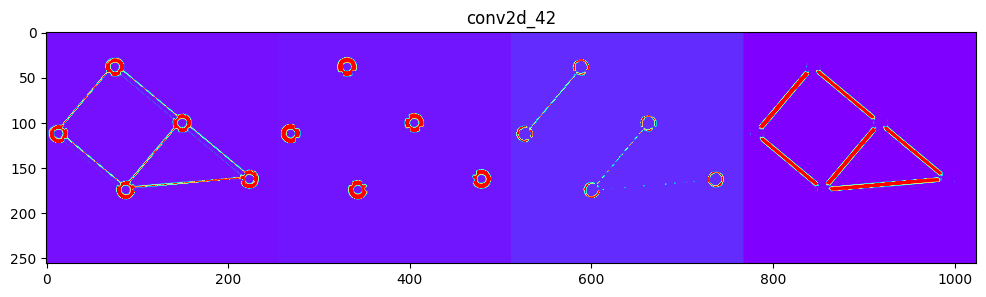

max_pooling2d_42 +n_features= 4


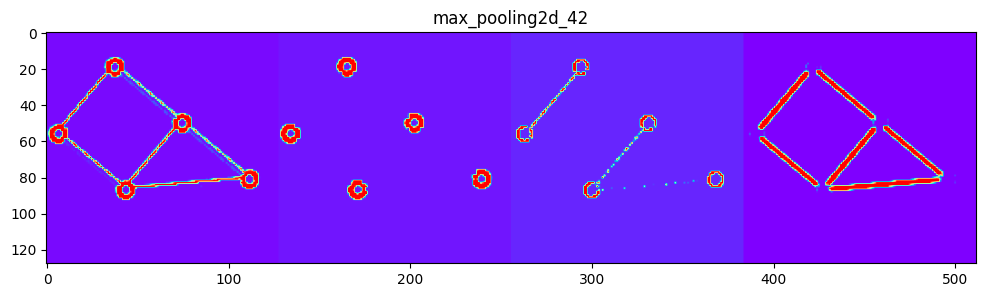

dropout_42 +n_features= 4


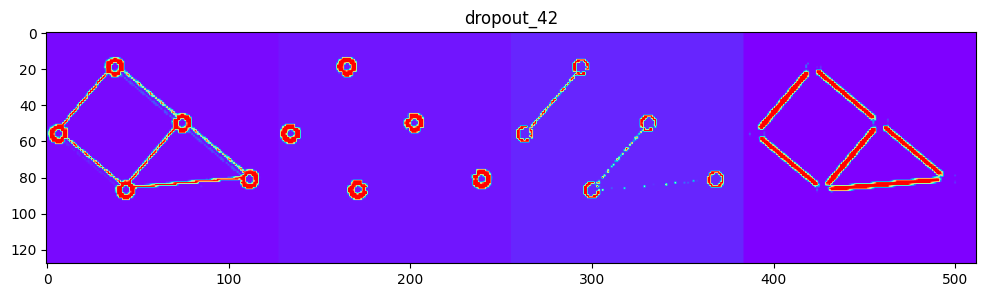

conv2d_43 +n_features= 4


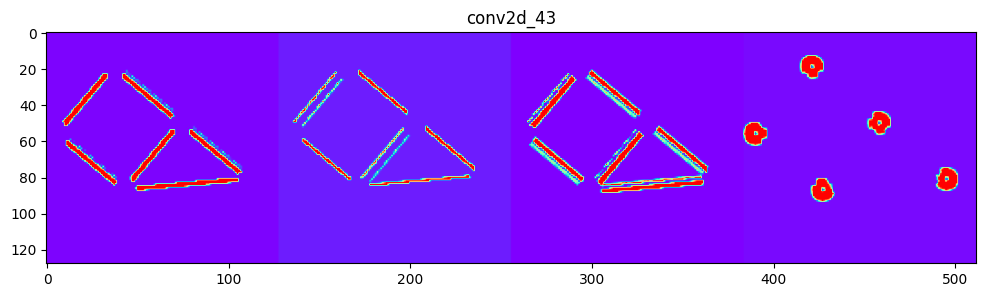

max_pooling2d_43 +n_features= 4


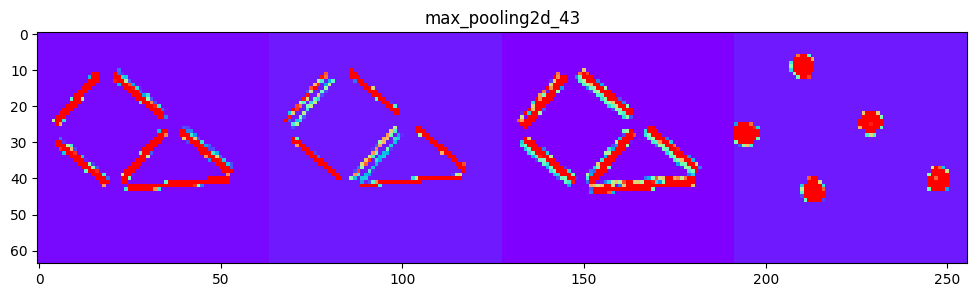

dropout_43 +n_features= 4


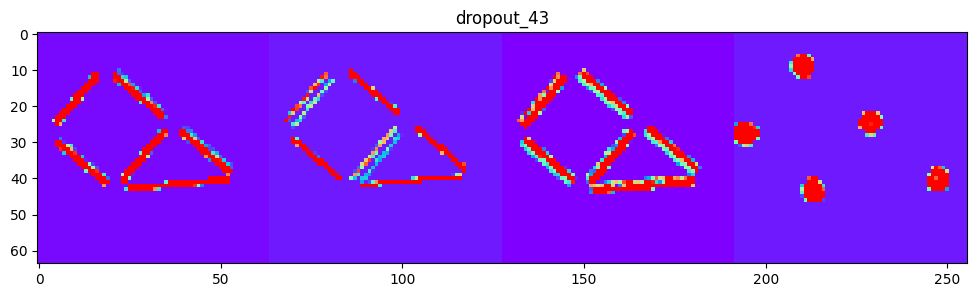

conv2d_44 +n_features= 8


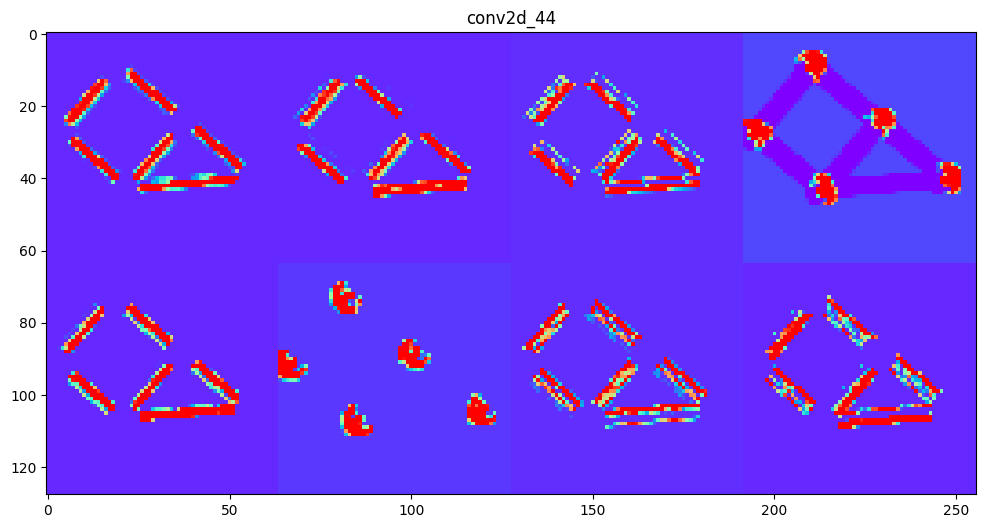

max_pooling2d_44 +n_features= 8


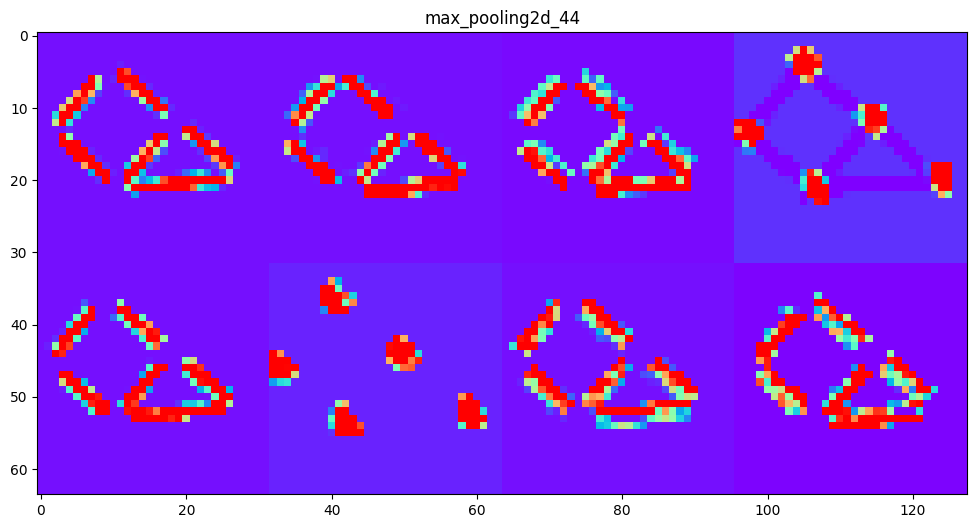

dropout_44 +n_features= 8


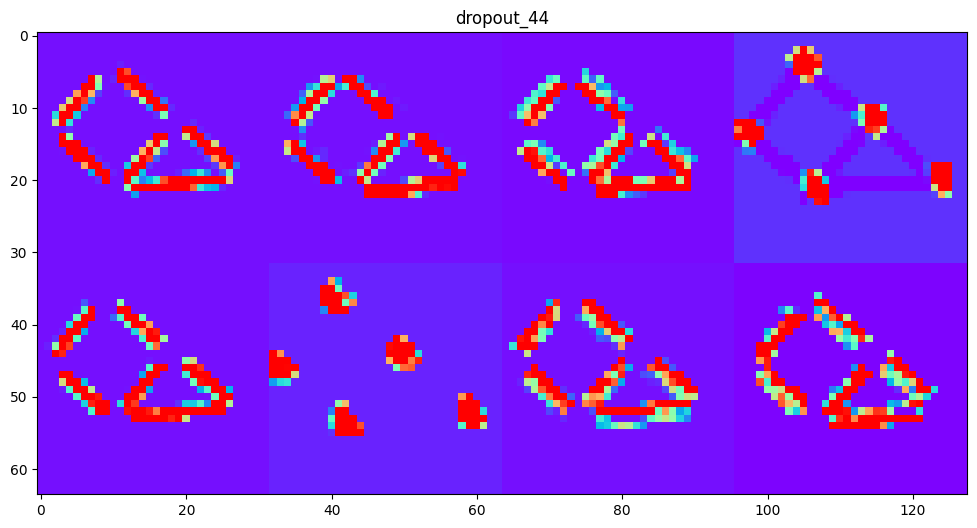

conv2d_45 +n_features= 8


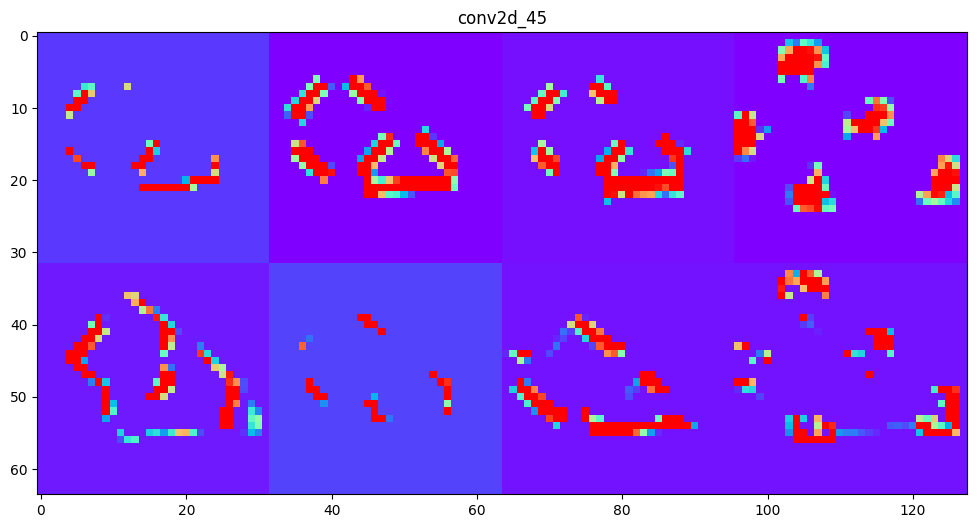

max_pooling2d_45 +n_features= 8


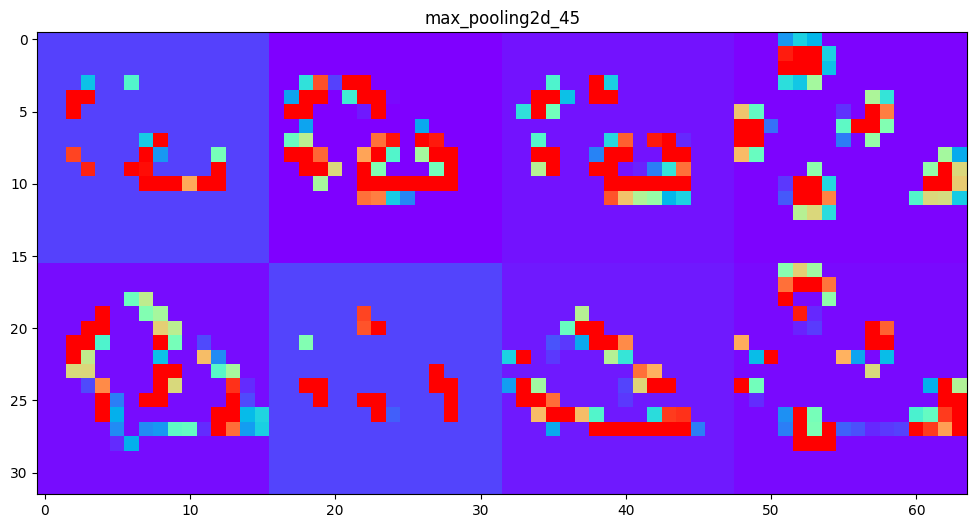

dropout_45 +n_features= 8


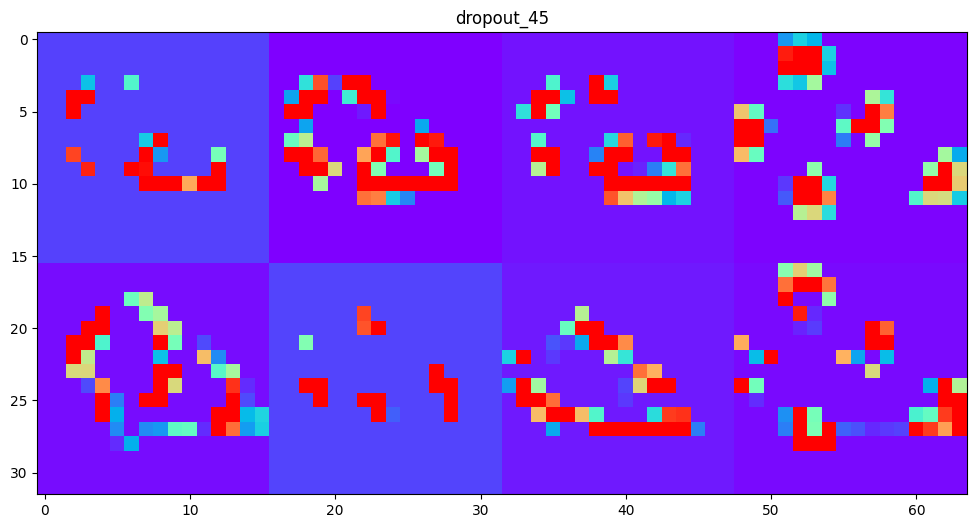

conv2d_46 +n_features= 16


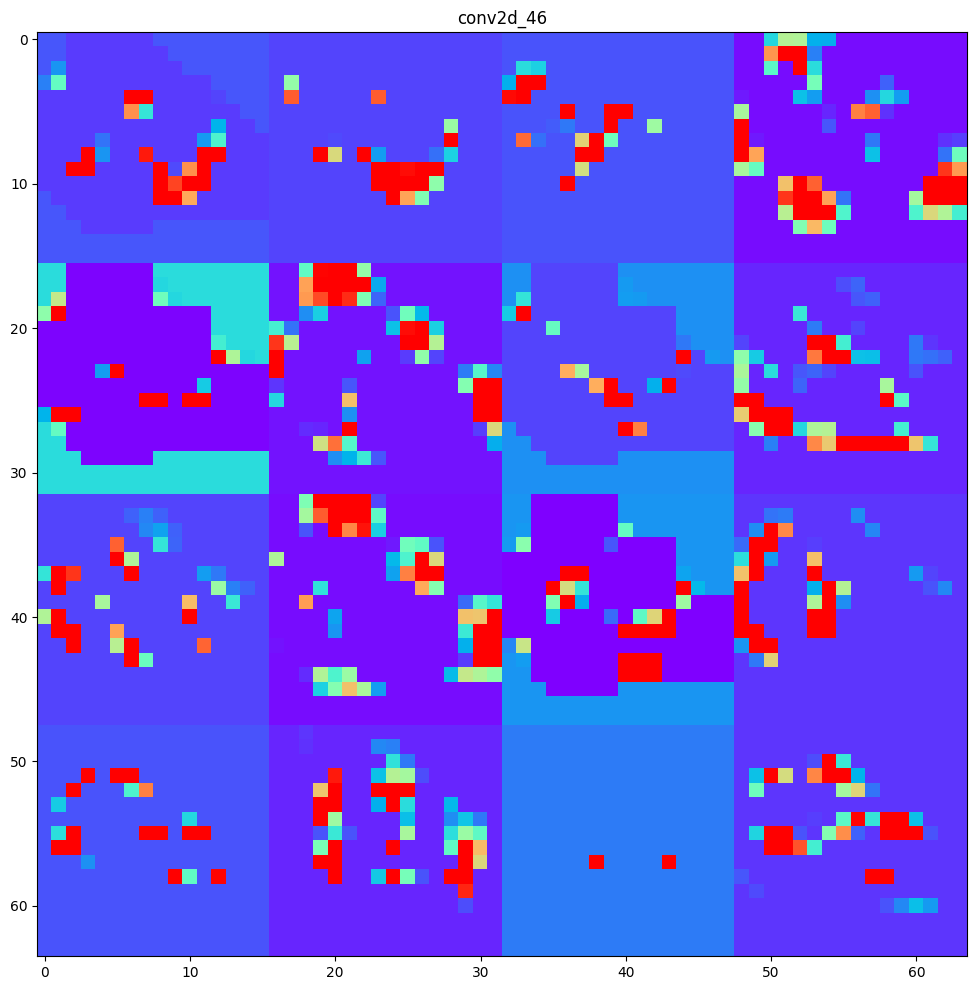

max_pooling2d_46 +n_features= 16


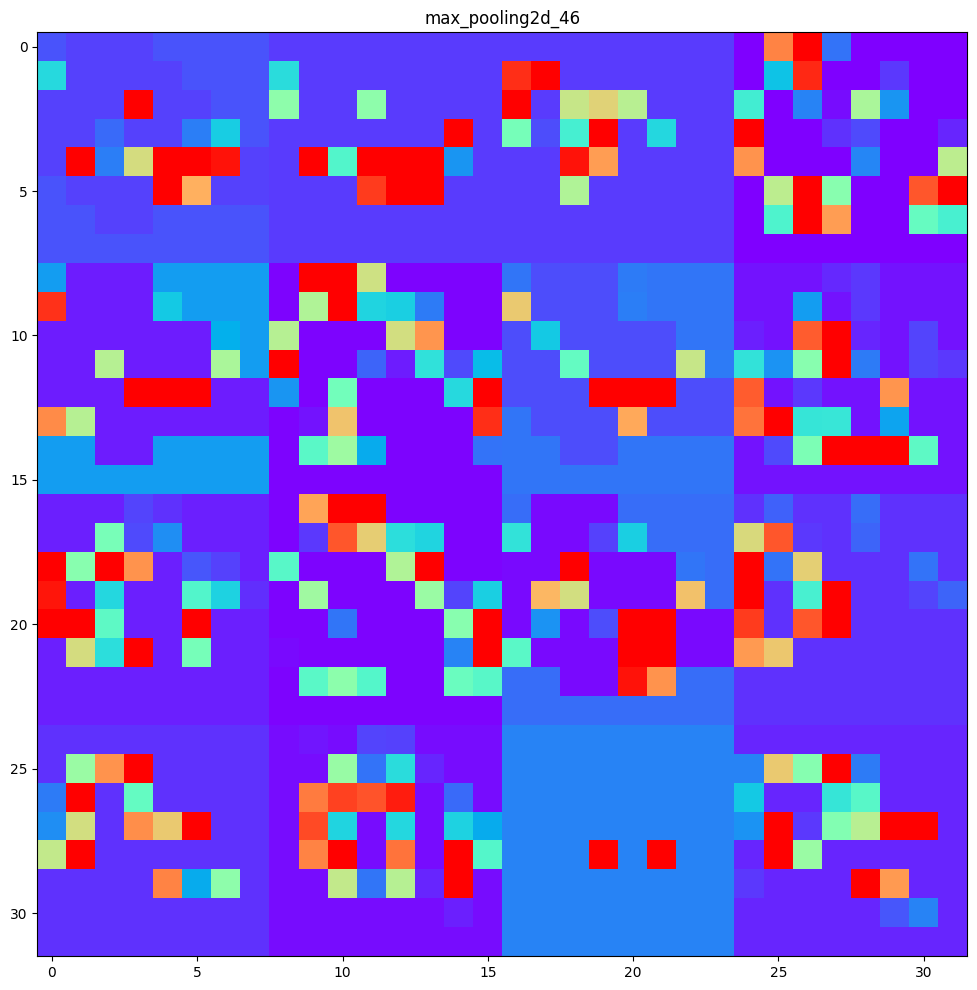

dropout_46 +n_features= 16


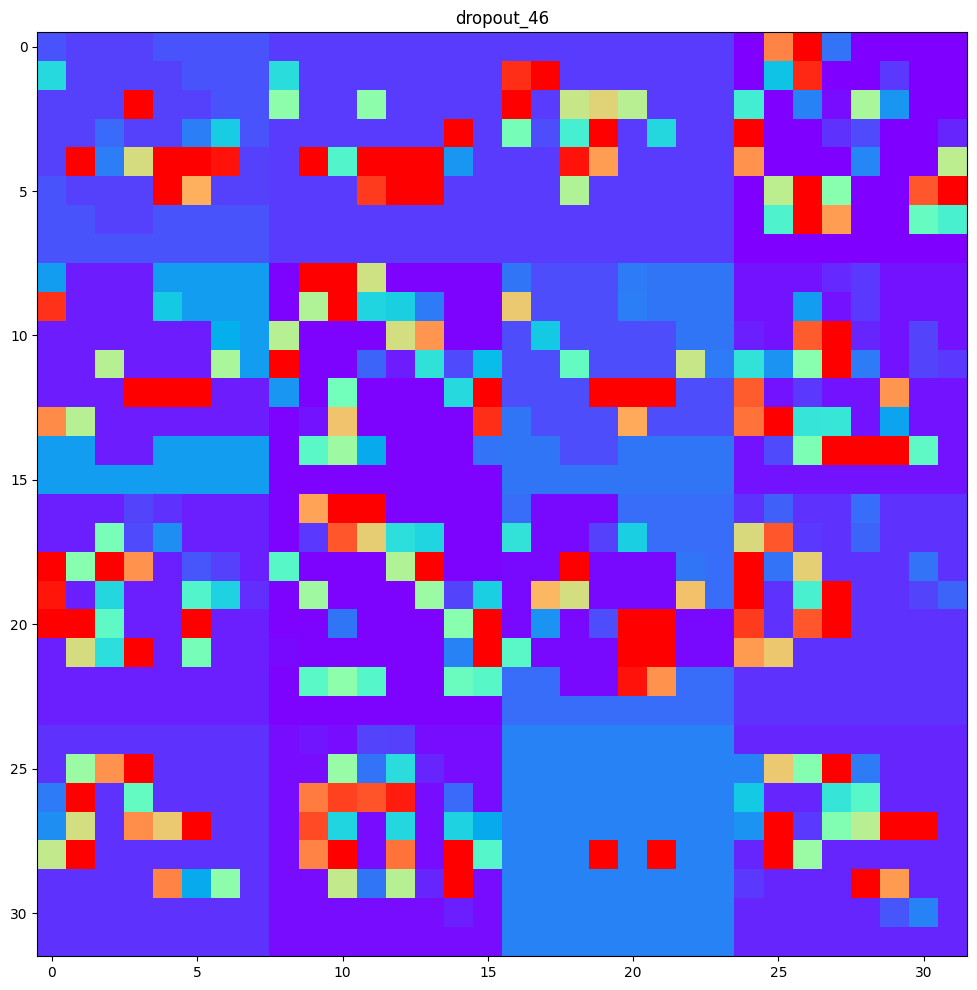

conv2d_47 +n_features= 16


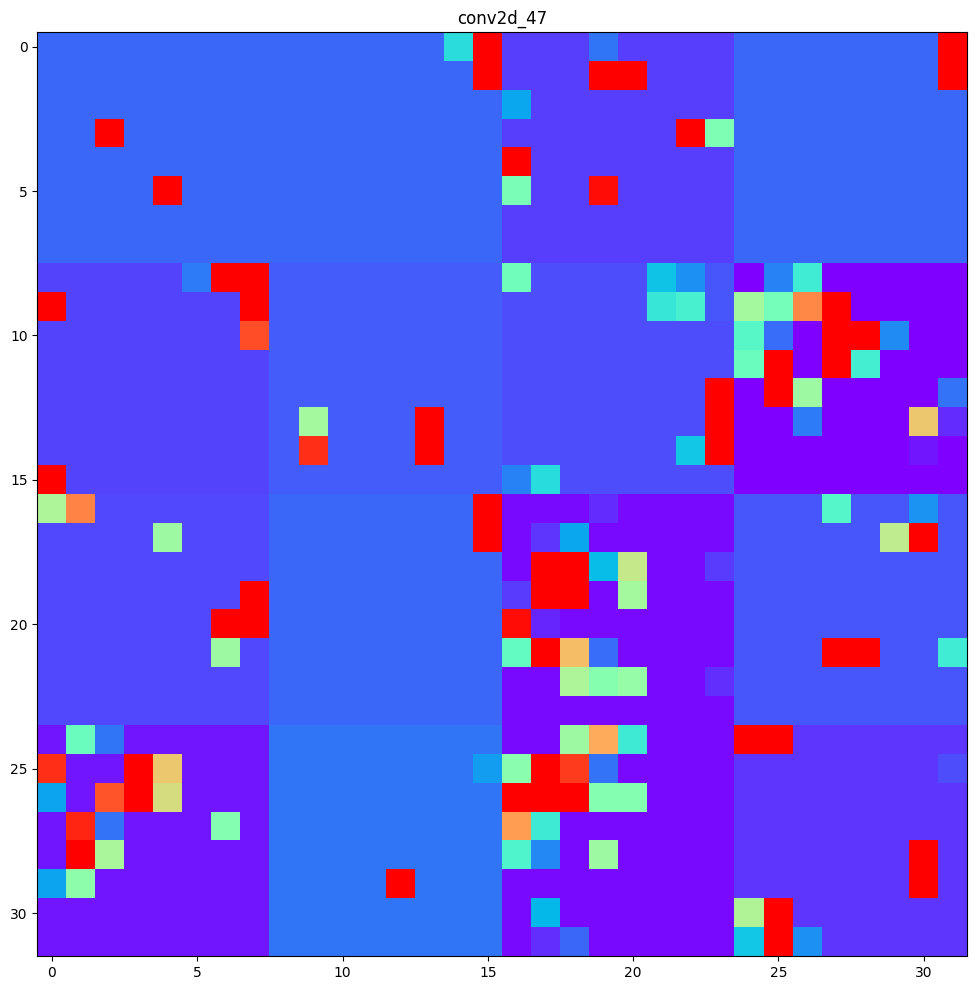

max_pooling2d_47 +n_features= 16


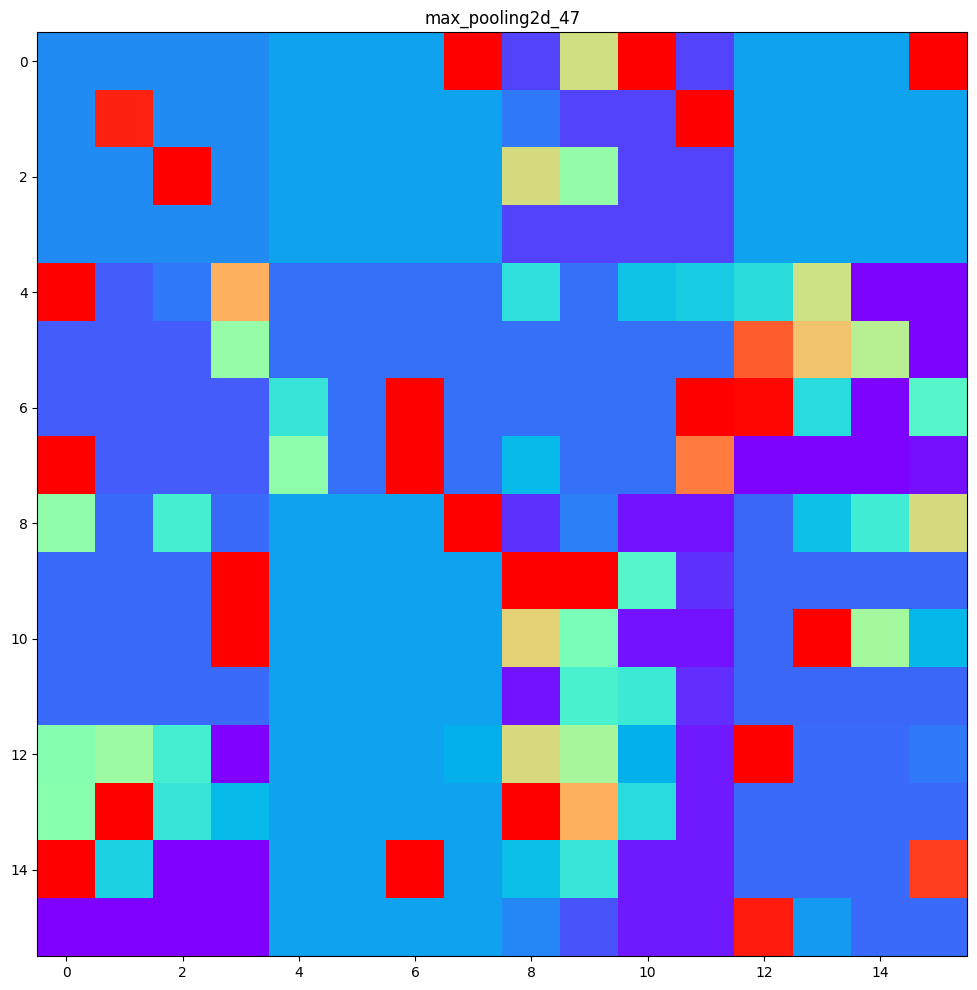

dropout_47 +n_features= 16


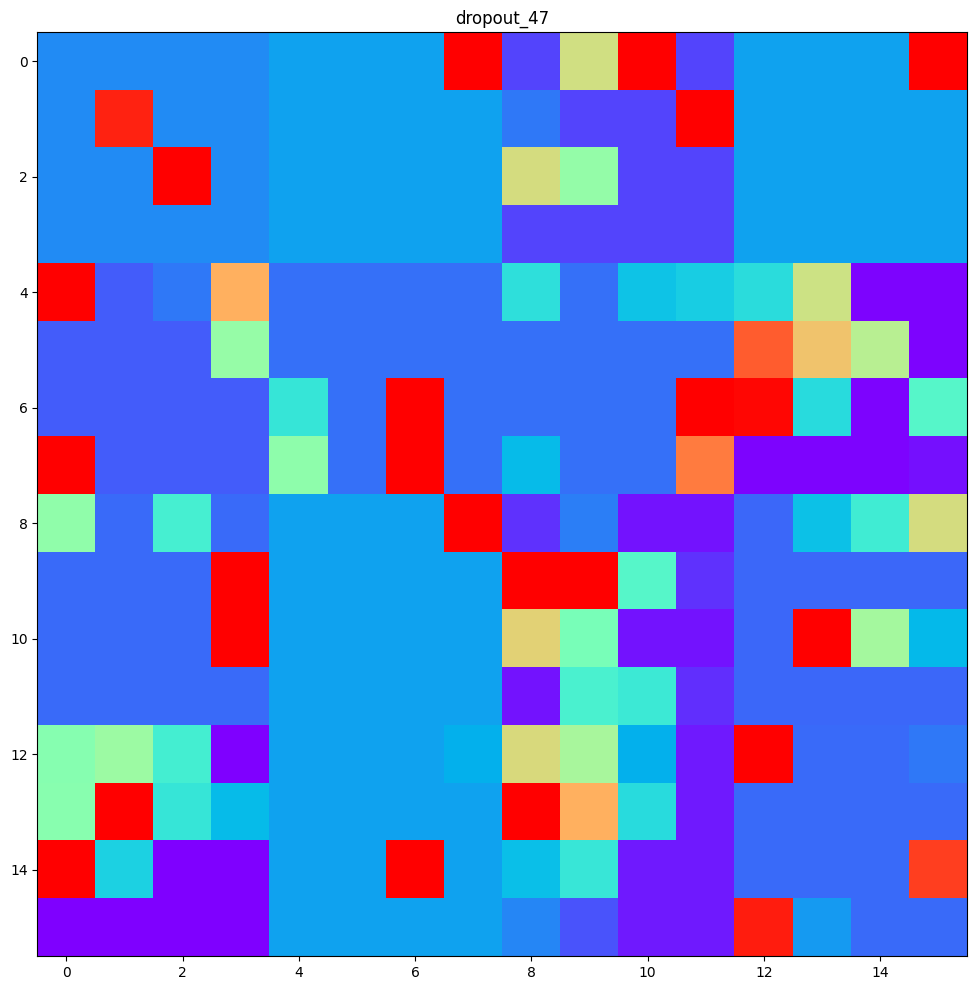

In [18]:
layer_names = []
for layer in model.layers[:18]:
    layer_names.append(layer.name)
print('layer_names=',layer_names)

images_per_row = 4
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    print(layer_name,'+n_features=',n_features)
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    scale = 3. / size
    plt.figure(figsize=(scale * display_grid.shape[1],    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='rainbow')  #原代码是cmap='viridis'，感觉采用 cmap='gray'更加能够反映轮廓、边缘
    plt.savefig(os.path.join('.\\output',layer_name+'.png'))
    plt.show()